**TF-IDF** (Term Frequency - Inverse Document Frequency) is a word numerisation technique in NLP which weights terms by their importance in the document relative to a corpus. The idea is that:

1. Words that appear frequently in a specific document should be weighted higher.
2. Words that appear frequently across all documents (like "the", "is", and "and") have less signal and are weighted lower.

#### Step-by-step:

**1. Term Frequency (TF)**

Measures how frequently a term occurs in a document.

$$\text{tf}(t, d) = \frac{\text{count of \textit{t} in \textit{d}}}{\text{total words in \textit{d}}}$$

**2. Inverse Document Frequency (IDF)**

$$\text{idf}(t) = \log\left(\frac{N}{1 + df_t}\right)$$

Measures how rare a term is across the entire corpus of documents.

* $N$: Total number of documents.
* $df_t$: Number of documents containing the term.
* The `+1` (smoothing) prevents division by zero if a term isn't in the training corpus.
* The `log` function dampens the magnitude of the IDF weight, ensuring that extremely rare words don't overpower the entire vector.

**3. TF-IDF Score**

The final score is the product of these two metrics:

$$\text{tf-idf}(t, d) = \text{tf}(t, d) \times \text{idf}(t)$$

Words that are frequent in a specific document but rare across the corpus receive the highest scores, making them the "signature" terms for that document.

**4. Normalisation**

TF-IDF vectors are typically normalised to unit length using L2 (Euclidean) normalisation:

$$\hat{v} = \frac{v}{\|v\|_2} = \frac{v}{\sqrt{\sum_i v_i^2}}$$

Otherwise, longer documents would naturally have higher TF-IDF magnitudes.

---

Scikit-learn provides `TfidfVectorizer`, which can convert a collection of text documents into a matrix of TF-IDF features. Here we visualise a heatmap of 4 simple texts to illustrate TF-IDF in effect:

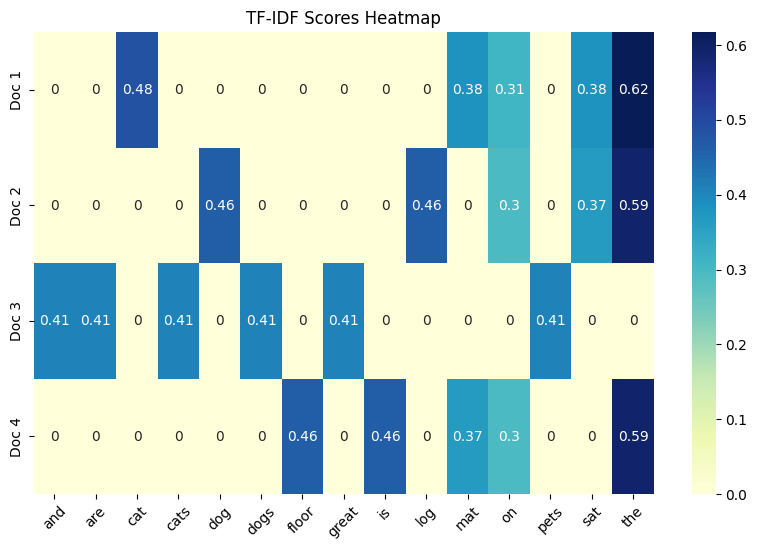

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "the cat sat on the mat",
    "the dog sat on the log",
    "cats and dogs are great pets",
    "the mat is on the floor"
]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

df_tfidf = pd.DataFrame(
    tfidf_matrix.toarray(), 
    columns=vectorizer.get_feature_names_out(),
    index=[f"Doc {i+1}" for i in range(len(corpus))]
)

plt.figure(figsize=(10, 6))
sns.heatmap(df_tfidf, annot=True, cmap="YlGnBu")
plt.title("TF-IDF Scores Heatmap")
plt.xticks(rotation=45)
plt.show()